<a href="https://colab.research.google.com/github/LaianeNR/TechCorp-Brasil/blob/LaianeRascunho/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def gerar_dataframe_tratamento(qtd=1_000_000, seed=42):
    np.random.seed(seed)

    # Gerar IDs únicos
    #np.random.seed(seed)
    id_funcionario = np.arange(1, qtd + 1)
    idade = np.random.randint(18, 60, size=qtd)

    # Definir probabilidades para Gênero
    prob_masculino = 0.45
    prob_feminino = 0.35
    prob_nao_informar_genero = 0.20
    genero_choices = ['Masculino', 'Feminino', 'Prefiro não informar']
    genero_probs = [prob_masculino, prob_feminino, prob_nao_informar_genero]

    # Gerar coluna Gênero
    genero = np.random.choice(genero_choices, size=qtd, p=genero_probs)

    estado_civil = np.random.choice(['Solteiro(a)', 'Casado(a)', 'Divorciado(a)', 'Prefiro não informar'], size=qtd)
    escolaridade = np.random.choice(['Ensino Médio', 'Graduação', 'Pós', 'Mestrado', 'Doutorado', 'Prefiro não informar'], size=qtd)
    cor_raca = np.random.choice(['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Prefiro não informar'], size=qtd)
    pcd = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.05, 0.95])
    estado_uf = np.random.choice(['SP', 'RJ', 'MG', 'BA', 'RS', 'CE', 'DF', 'PE', 'AM','MT','PR','AL','SC', ' ','Não informado'], size=qtd)

    # Profissionais
    area_formacao = np.random.choice(['Cientista de Dados/Data Scientist', 'Desenvolvedor', 'Engenharia de Software', 'Marketing',
                                      'RH','Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)','Analista de Dados/Data Analyst',
                                      'Administrativo', 'Financeiro', 'Vendas', 'Pesquisa e Desenvolvimento',
                                      'Engenharia de Dados/Data Engineer', 'UX/UI', 'Suporte Técnico',
                                      'Prefiro não informar'], size=qtd)

    departamento = np.random.choice(['Vendas', 'RH', 'TI', 'Pesquisa', 'Negorcio'], size=qtd)
    cargo = np.random.choice(['Especialista','Gestor?','Cargo como Gestor?','Tempo de experiencia na área','Gerente', 'Senior', 'Pleno', 'Junior', 'Estagiário','Prefiro não informar'], size=qtd)
    nivel_cargo = np.random.randint(1, 6, size=qtd)
    envolvimento_trabalho = np.random.randint(1, 5, size=qtd)
    anos_na_empresa = np.random.randint(0, 41, size=qtd)

    # Compensação
    salario_mensal = np.random.randint(1500, 25000, size=qtd)
    faixa_salarial = pd.cut(salario_mensal, bins=[0, 3000, 7000, 12000, 18000, np.inf],
                            labels=['Muito baixa', 'Baixa', 'Média', 'Alta', 'Muito alta'])
    aumento_salarial = np.random.randint(0, 30, size=qtd)
    nivel_opcao_acao = np.random.randint(0, 4, size=qtd)

    # Satisfação
    satisfacao_trabalho = np.random.randint(1, 6, size=qtd)
    satisfacao_ambiente = np.random.randint(1, 6, size=qtd)
    satisfacao_relacionamento = np.random.randint(1, 6, size=qtd)

    # Estilo de vida
    hora_extra = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.3, 0.7])
    equilibrio_vida_trabalho = np.random.randint(1, 5, size=qtd)
    viagem_negocios = np.random.choice(['Nunca', 'Raramente', 'Frequentemente'], size=qtd)
    distancia_casa = np.random.randint(1, 50, size=qtd)

    # Desempenho
    avaliacao_desempenho = np.random.choice([3, 4], size=qtd, p=[0.9, 0.1])
    treinamentos_ano = np.random.randint(0, 6, size=qtd)

    # Mudança de empreg?
    pretende_mudar = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd, p=[0.3, 0.6, 0.1])
    motivo_mudanca = np.random.choice([
        'Salário', 'Home Office', 'Ambiente de trabalho',
        'Desenvolvimento profissional', 'Mudança de cidade', 'Não responder'], size=qtd)

    # Target: Saiu da empresa (desbalanceado)
    saiu_da_empresa = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.16, 0.84])
    saiu_da_empresa = pd.Categorical(saiu_da_empresa, categories=['Sim', 'Não'], ordered=True)

    # Criar DataFrame
    df = pd.DataFrame({
        'ID Funcionario': id_funcionario,
        'Idade': idade,
        'Gênero': genero,
        'Estado Civil': estado_civil,
        'Escolaridade': escolaridade,
        'Cor/Raça': cor_raca,
        'PCD': pcd,
        'Estado/UF': estado_uf,
        'Área de Formação': area_formacao,
        'Departamento': departamento,
        'Cargo': cargo,
        'Nível do Cargo': nivel_cargo,
        'Envolvimento no Trabalho': envolvimento_trabalho,
        'Anos na Empresa': anos_na_empresa,
        'Salário Mensal': salario_mensal,
        'Faixa Salarial': faixa_salarial,
        'Aumento Salarial (%)': aumento_salarial,
        'Nível de Opção de Ação': nivel_opcao_acao,
        'Satisfação no Trabalho': satisfacao_trabalho,
        'Satisfação com o Ambiente de Trabalho': satisfacao_ambiente,
        'Satisfação com Relacionamento no Trabalho': satisfacao_relacionamento,
        'Hora Extra': hora_extra,
        'Equilíbrio Vida-Trabalho': equilibrio_vida_trabalho,
        'Viagem a Negócios': viagem_negocios,
        'Distância Casa (km)': distancia_casa,
        'Avaliação de Desempenho (1-5)': avaliacao_desempenho,
        'Treinamentos por Ano': treinamentos_ano,
        'Pretende Mudar de Emprego?': pretende_mudar,
        'Motivo da Mudança de Emprego': motivo_mudanca,
        'Saiu da Empresa?': saiu_da_empresa
    })

    return df

In [ ]:
df_funcionarios = gerar_dataframe_tratamento(qtd=1_000_000, seed=42)

In [ ]:
df_funcionarios.head(5)

,ID Funcionario,Idade,Gênero,Estado Civil,Escolaridade,Cor/Raça,PCD,Estado/UF,Área de Formação,Departamento,...,Satisfação com Relacionamento no Trabalho,Hora Extra,Equilíbrio Vida-Trabalho,Viagem a Negócios,Distância Casa (km),Avaliação de Desempenho (1-5),Treinamentos por Ano,Pretende Mudar de Emprego?,Motivo da Mudança de Emprego,Saiu da Empresa?
0,1,56,Masculino,Prefiro não informar,Doutorado,Prefiro não informar,Não,RS,Financeiro,RH,...,5,Não,2,Frequentemente,20,4,0,Não,Mudança de cidade,Não
1,2,46,Masculino,Casado(a),Doutorado,Prefiro não informar,Não,BA,Suporte Técnico,Vendas,...,2,Não,1,Nunca,22,3,0,Prefiro não informar,Home Office,Não
2,3,32,Masculino,Solteiro(a),Pós,Branca,Não,RS,Financeiro,Negorcio,...,5,Não,1,Frequentemente,25,3,4,Não,Não responder,Não
3,4,25,Masculino,Solteiro(a),Prefiro não informar,Branca,Não,SC,RH,RH,...,3,Não,3,Frequentemente,6,3,1,Sim,Desenvolvimento profissional,Não
4,5,38,Masculino,Prefiro não informar,Prefiro não informar,Branca,Não,BA,Administrativo,TI,...,1,Não,4,Frequentemente,5,3,5,Prefiro não informar,Ambiente de trabalho,Não


In [ ]:
# Verificando valores nulos
print("🧹 Valores nulos por coluna:")
df_funcionarios.isnull().sum().sort_values(ascending=False)

🧹 Valores nulos por coluna:


,0
ID Funcionario,0
Idade,0
Gênero,0
Estado Civil,0
Escolaridade,0
Cor/Raça,0
PCD,0
Estado/UF,0
Área de Formação,0
Departamento,0


In [ ]:
df_funcionarios = gerar_dataframe_tratamento(qtd=1_000_000, seed=42)

# Verificar estrutura e estatísticas do dataset
print("🔎 Informações básicas:")
df_funcionarios.info()

print("\n📊 Estatísticas descritivas:")
display(df_funcionarios.describe())

In [ ]:
import numpy as np
import pandas as pd

def gerar_dataframe_tratamento(qtd=1_000_000, seed=42):
    np.random.seed(seed)

    # Gerar IDs únicos
    #np.random.seed(seed)
    id_funcionario = np.arange(1, qtd + 1)
    idade = np.random.randint(18, 60, size=qtd)

    # Definir probabilidades para Gênero
    prob_masculino = 0.45
    prob_feminino = 0.35
    prob_nao_informar_genero = 0.20
    genero_choices = ['Masculino', 'Feminino', 'Prefiro não informar']
    genero_probs = [prob_masculino, prob_feminino, prob_nao_informar_genero]

    # Gerar coluna Gênero
    genero = np.random.choice(genero_choices, size=qtd, p=genero_probs)

    estado_civil = np.random.choice(['Solteiro(a)', 'Casado(a)', 'Divorciado(a)', 'Prefiro não informar'], size=qtd)
    escolaridade = np.random.choice(['Ensino Médio', 'Graduação', 'Pós', 'Mestrado', 'Doutorado', 'Prefiro não informar'], size=qtd)
    cor_raca = np.random.choice(['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Prefiro não informar'], size=qtd)
    pcd = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.05, 0.95])
    estado_uf = np.random.choice(['SP', 'RJ', 'MG', 'BA', 'RS', 'CE', 'DF', 'PE', 'AM','MT','PR','AL','SC', ' ','Não informado'], size=qtd)

    # Profissionais
    area_formacao = np.random.choice(['Cientista de Dados/Data Scientist', 'Desenvolvedor', 'Engenharia de Software', 'Marketing',
                                      'RH','Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)','Analista de Dados/Data Analyst',
                                      'Administrativo', 'Financeiro', 'Vendas', 'Pesquisa e Desenvolvimento',
                                      'Engenharia de Dados/Data Engineer', 'UX/UI', 'Suporte Técnico',
                                      'Prefiro não informar'], size=qtd)

    departamento = np.random.choice(['Vendas', 'RH', 'TI', 'Pesquisa', 'Negorcio'], size=qtd)
    cargo = np.random.choice(['Especialista','Gestor?','Cargo como Gestor?','Tempo de experiencia na área','Gerente', 'Senior', 'Pleno', 'Junior', 'Estagiário','Prefiro não informar'], size=qtd)
    nivel_cargo = np.random.randint(1, 6, size=qtd)
    envolvimento_trabalho = np.random.randint(1, 5, size=qtd)
    anos_na_empresa = np.random.randint(0, 41, size=qtd)

    # Compensação
    salario_mensal = np.random.randint(1500, 25000, size=qtd)
    faixa_salarial = pd.cut(salario_mensal, bins=[0, 3000, 7000, 12000, 18000, np.inf],
                            labels=['Muito baixa', 'Baixa', 'Média', 'Alta', 'Muito alta'])
    aumento_salarial = np.random.randint(0, 30, size=qtd)
    nivel_opcao_acao = np.random.randint(0, 4, size=qtd)

    # Satisfação
    satisfacao_trabalho = np.random.randint(1, 6, size=qtd)
    satisfacao_ambiente = np.random.randint(1, 6, size=qtd)
    satisfacao_relacionamento = np.random.randint(1, 6, size=qtd)

    # Estilo de vida
    hora_extra = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.3, 0.7])
    equilibrio_vida_trabalho = np.random.randint(1, 5, size=qtd)
    viagem_negocios = np.random.choice(['Nunca', 'Raramente', 'Frequentemente'], size=qtd)
    distancia_casa = np.random.randint(1, 50, size=qtd)

    # Desempenho
    avaliacao_desempenho = np.random.choice([3, 4], size=qtd, p=[0.9, 0.1])
    treinamentos_ano = np.random.randint(0, 6, size=qtd)

    # Mudança de empreg?
    pretende_mudar = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd, p=[0.3, 0.6, 0.1])
    motivo_mudanca = np.random.choice([
        'Salário', 'Home Office', 'Ambiente de trabalho',
        'Desenvolvimento profissional', 'Mudança de cidade', 'Não responder'], size=qtd)

    # Target: Saiu da empresa (desbalanceado)
    saiu_da_empresa = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.16, 0.84])
    saiu_da_empresa = pd.Categorical(saiu_da_empresa, categories=['Sim', 'Não'], ordered=True)

    # Criar DataFrame
    df = pd.DataFrame({
        'ID Funcionario': id_funcionario,
        'Idade': idade,
        'Gênero': genero,
        'Estado Civil': estado_civil,
        'Escolaridade': escolaridade,
        'Cor/Raça': cor_raca,
        'PCD': pcd,
        'Estado/UF': estado_uf,
        'Área de Formação': area_formacao,
        'Departamento': departamento,
        'Cargo': cargo,
        'Nível do Cargo': nivel_cargo,
        'Envolvimento no Trabalho': envolvimento_trabalho,
        'Anos na Empresa': anos_na_empresa,
        'Salário Mensal': salario_mensal,
        'Faixa Salarial': faixa_salarial,
        'Aumento Salarial (%)': aumento_salarial,
        'Nível de Opção de Ação': nivel_opcao_acao,
        'Satisfação no Trabalho': satisfacao_trabalho,
        'Satisfação com o Ambiente de Trabalho': satisfacao_ambiente,
        'Satisfação com Relacionamento no Trabalho': satisfacao_relacionamento,
        'Hora Extra': hora_extra,
        'Equilíbrio Vida-Trabalho': equilibrio_vida_trabalho,
        'Viagem a Negócios': viagem_negocios,
        'Distância Casa (km)': distancia_casa,
        'Avaliação de Desempenho (1-5)': avaliacao_desempenho,
        'Treinamentos por Ano': treinamentos_ano,
        'Pretende Mudar de Emprego?': pretende_mudar,
        'Motivo da Mudança de Emprego': motivo_mudanca,
        'Saiu da Empresa?': saiu_da_empresa
    })

    return df

df_funcionarios = gerar_dataframe_tratamento(qtd=1_000_000, seed=42)

# Verificar estrutura e estatísticas do dataset
print("🔎 Informações básicas:")
df_funcionarios.info()

print("\n📊 Estatísticas descritivas:")
display(df_funcionarios.describe())

🔎 Informações básicas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column                                     Non-Null Count    Dtype   
---  ------                                     --------------    -----   
 0   ID Funcionario                             1000000 non-null  int64   
 1   Idade                                      1000000 non-null  int64   
 2   Gênero                                     1000000 non-null  object  
 3   Estado Civil                               1000000 non-null  object  
 4   Escolaridade                               1000000 non-null  object  
 5   Cor/Raça                                   1000000 non-null  object  
 6   PCD                                        1000000 non-null  object  
 7   Estado/UF                                  1000000 non-null  object  
 8   Área de Formação                           1000000 non-null  object  
 9   Departamento                       

,ID Funcionario,Idade,Nível do Cargo,Envolvimento no Trabalho,Anos na Empresa,Salário Mensal,Aumento Salarial (%),Nível de Opção de Ação,Satisfação no Trabalho,Satisfação com o Ambiente de Trabalho,Satisfação com Relacionamento no Trabalho,Equilíbrio Vida-Trabalho,Distância Casa (km),Avaliação de Desempenho (1-5),Treinamentos por Ano
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,38.506375,2.997627,2.501079,20.018136,13265.583972,14.500808,1.499540,3.000383,2.997670,2.999893,2.499754,24.990797,3.100062,2.499673
std,288675.278933,12.118957,1.413969,1.118215,11.830372,6782.517188,8.658157,1.117088,1.414433,1.414698,1.414771,1.117769,14.135325,0.300083,1.707876
min,1.000000,18.000000,1.000000,1.000000,0.000000,1500.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250000.750000,28.000000,2.000000,2.000000,10.000000,7397.000000,7.000000,1.000000,2.000000,2.000000,2.000000,1.000000,13.000000,3.000000,1.000000
50%,500000.500000,39.000000,3.000000,3.000000,20.000000,13266.000000,14.000000,1.000000,3.000000,3.000000,3.000000,3.000000,25.000000,3.000000,2.000000
75%,750000.250000,49.000000,4.000000,4.000000,30.000000,19140.000000,22.000000,2.000000,4.000000,4.000000,4.000000,3.000000,37.000000,3.000000,4.000000
max,1000000.000000,59.000000,5.000000,4.000000,40.000000,24999.000000,29.000000,3.000000,5.000000,5.000000,5.000000,4.000000,49.000000,4.000000,5.000000


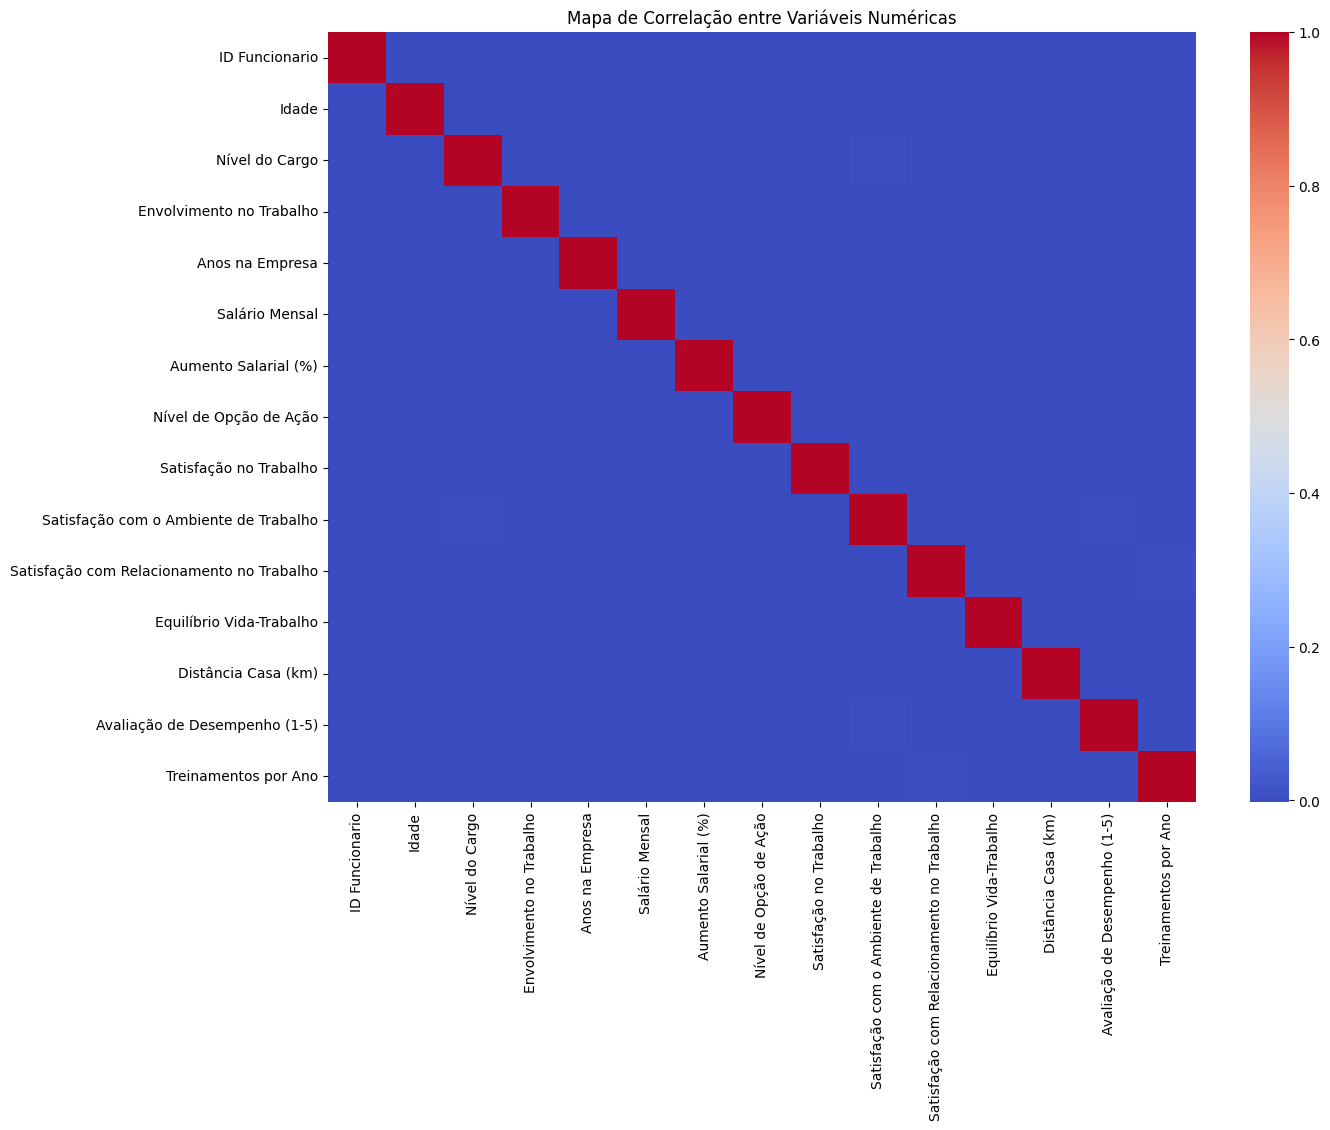

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor com correlações
plt.figure(figsize=(14,10))
sns.heatmap(df_funcionarios.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

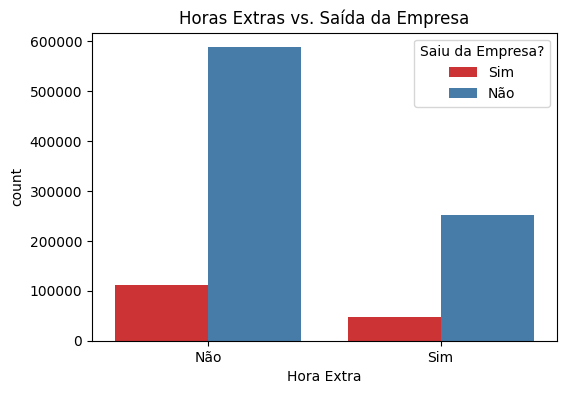

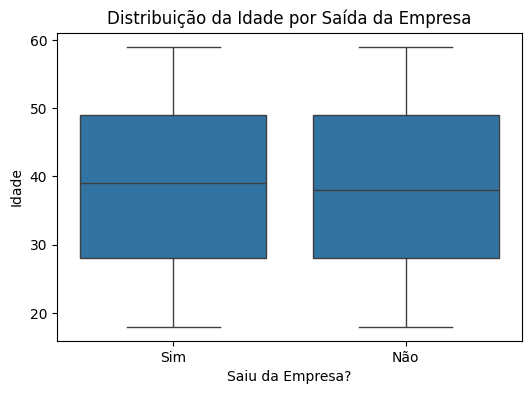

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relação entre horas extras e saída da empresa
plt.figure(figsize=(6,4))
sns.countplot(x='Hora Extra', hue='Saiu da Empresa?', data=df_funcionarios, palette='Set1')
plt.title('Horas Extras vs. Saída da Empresa')
plt.show()

# Distribuição de idade por saída da empresa
plt.figure(figsize=(6,4))
sns.boxplot(x='Saiu da Empresa?', y='Idade', data=df_funcionarios)
plt.title('Distribuição da Idade por Saída da Empresa')
plt.show()